<a href="https://colab.research.google.com/github/bhavesh2327/diabetespridictionml/blob/main/diabetespridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and analysis!

In [4]:
diabetesdataset = pd.read_csv('/content/sample_data/diabetes dataset.csv')

In [5]:
#printing first rows of the dataset!!
diabetesdataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#number of rows and columns in this dataset
diabetesdataset.shape

(768, 9)

In [7]:
#getting the statistical measures of the data
diabetesdataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetesdataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


---> 0 - non diabetic , 1 people with diabetes

In [11]:
diabetesdataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [18]:
#seprating the data and labels
x = diabetesdataset.drop(columns = 'Outcome',axis=1)
y = diabetesdataset['Outcome']
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization!!!!..

In [19]:
scaler = StandardScaler()
scaler.fit(x)
standardizeddata = scaler.transform(x)
print(standardizeddata)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
x = standardizeddata
y = diabetesdataset['Outcome']
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


train data test data

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


training the model

In [27]:
classifer = svm.SVC(kernel='linear') # This line defines the 'classifer' variable

In [28]:
#training the support vector machine classifier
classifer.fit(x_train,y_train)

SVC(kernel='linear')

model evalution and accuracy

In [30]:
x_train_prediction = classifer.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [34]:
x_test_prediction = classifer.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)
print('Accuracy score of the training data : ',test_data_accuracy)

Accuracy score of the training data :  0.7727272727272727


In [36]:
# making a predictive system
input_data = (4,110,92,0,0,37.6,0.191,30)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifer.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


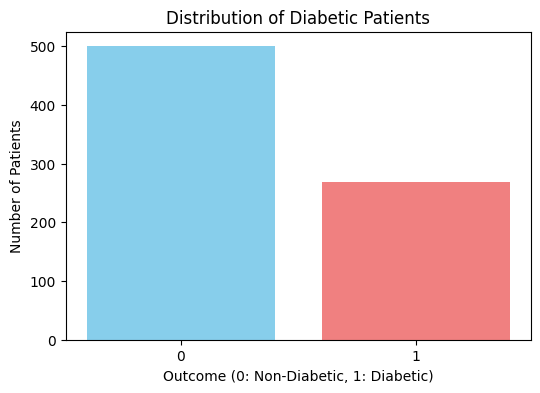

In [37]:
import matplotlib.pyplot as plt
outcome_counts = diabetesdataset['Outcome'].value_counts()

# Create the bar graph
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, color=['skyblue', 'lightcoral'])
plt.xlabel("Outcome (0: Non-Diabetic, 1: Diabetic)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Diabetic Patients")
plt.show()


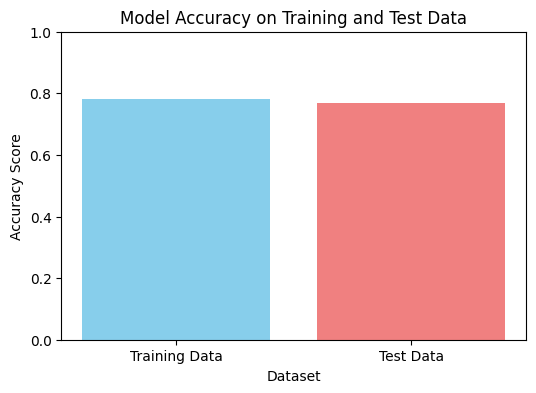

In [40]:


import matplotlib.pyplot as plt


training_data_accuracy = 0.78
test_data_accuracy = 0.77


# Create the bar graph
accuracy_scores = [training_data_accuracy, test_data_accuracy]
labels = ['Training Data', 'Test Data']

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_scores, color=['skyblue', 'lightcoral'])
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy on Training and Test Data")
plt.ylim(0, 1)
plt.show()


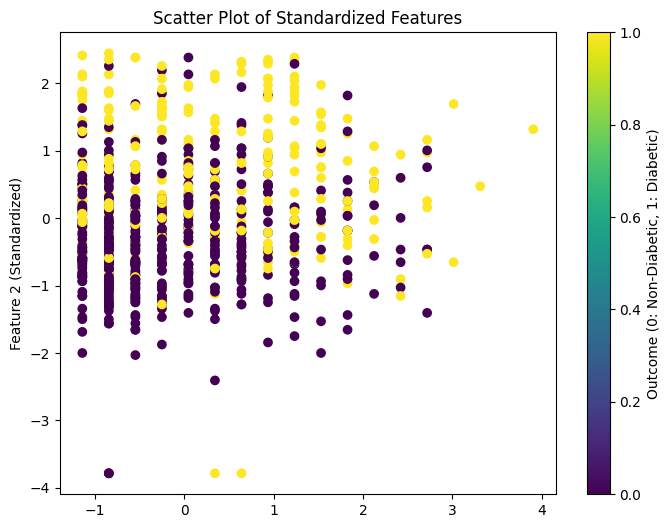

In [41]:


import matplotlib.pyplot as plt



# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis')
plt.ylabel("Feature 2 (Standardized)")
plt.title("Scatter Plot of Standardized Features")
plt.colorbar(label="Outcome (0: Non-Diabetic, 1: Diabetic)")
plt.show()
